### デバッグ用 (インストールしている場合は不要)

In [1]:
import sys
import os
sys.path.append(os.path.join(os.getcwd(), '..'))

### warningを消す

In [2]:
import warnings
warnings.simplefilter('ignore')

### モジュールのインポート

In [3]:
import pandas as pd
import numpy as np
from gaussian_process import GaussianProcess

### データの準備

In [4]:
X = np.array([0, 1, 3, 5, 6, 8]).reshape(-1, 1)
y = np.sin(X)
plot_X = np.linspace(0, 8, 801).reshape(-1, 1)

### インスタンス生成

In [5]:
gp = GaussianProcess()

### 交差検証でカーネルを決定

In [6]:
gp.cross_validation(X, y)
gp.best_kernel_

1**2 * Matern(length_scale=1, nu=2.5) + WhiteKernel(noise_level=1)

### predict

In [7]:
mu, sigma = gp.predict(plot_X)

### GPRの結果をプロット

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:xlabel='$x$', ylabel='$y$'>)

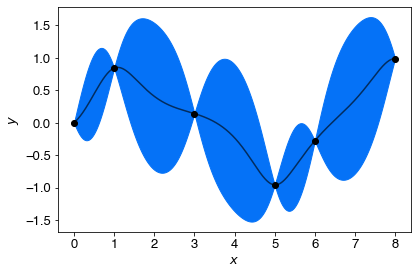

In [8]:
gp.plot(xlabel = '$x$', ylabel = '$y$')

### 獲得関数を定義して

In [9]:
EI = gp.expected_improvement(gp.best_estimator, X = X, y = y, plot_X = plot_X)

### GPRの結果と獲得関数の結果を併記

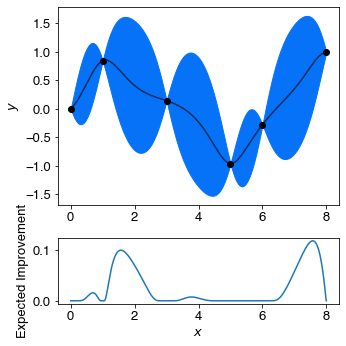

In [10]:
fig, ax, ax2 = gp.plot_with_acq(EI, xlabel = '$x$', ylabel = '$y$', figsize = (5, 5))
# fig.savefig(os.path.join(os.environ['HOME'], 'Desktop', 'example.png'), dpi = 300)

### 次に探索するべきなのは

In [11]:
dict_opt = EI.get_optimum()
dict_opt

{'i': 757, 'X': 7.57, 'mu': array([1.00236318]), 'sigma': array([0.61826677])}

### scaleを元に戻す
すでにyは，scaleが自動で行われているため．

In [12]:
inversed_mu, inversed_sigma = map(lambda x:x.flatten()[0], gp._inverse_scale(gp.scaler_y, dict_opt['mu'], dict_opt['sigma']))

### メッセージ

In [13]:
message = '次は，x = {0} (平均 {1:.2f}, 標準偏差 {2:.2f}) を探索したらいかがでしょう？'.format(dict_opt['X'], inversed_mu, inversed_sigma)
print(message)

次は，x = 7.57 (平均 0.78, 標準偏差 0.41) を探索したらいかがでしょう？
